In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [9]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier

class AdaBoost:
    def __init__(self, n_estimators=10,learning_rate = 1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate

    def calc_alpha(self, error):
        return 0.5 * np.log((1 - error) / (error + 1e-10))

    def sign(self, val):
        return 1 if val > 0 else 0

    def myFit(self, features, target):
        n_samples = features.shape[0]

        df = pd.DataFrame(features)
        df["target"] = target
        df["weights"] = 1 / n_samples

        self.alphas = []
        self.models = []

        for _ in range(self.n_estimators):
            dt = DecisionTreeClassifier(max_depth=1)

            dt.fit(features, target, sample_weight=df["weights"])
            pred = dt.predict(features)

            error = np.sum(df["weights"][df["target"] != pred])

            alpha = self.calc_alpha(error)

            df["weights"] *= np.exp(
                self.learning_rate * alpha * (df["target"] != pred).astype(int) -
                self.learning_rate * alpha * (df["target"] == pred).astype(int)
            )

            df["weights"] /= df["weights"].sum()

            self.models.append(dt)
            self.alphas.append(alpha)

    def myPredict(self, features):
        predictions = []

        for x in features:
            res = 0
            for alpha, model in zip(self.alphas, self.models):
                pred = model.predict(x.reshape(1, -1))[0]
                pred = 1 if pred == 1 else -1
                res += alpha * pred

            predictions.append(1 if res > 0 else 0)

        return np.array(predictions)


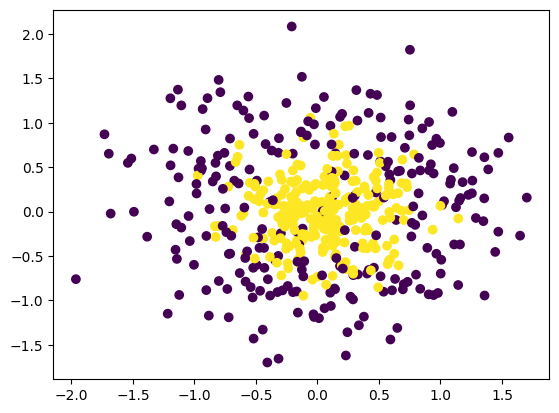

In [10]:
from sklearn.datasets import make_circles
features,target = make_circles(n_samples=500,noise=0.35,random_state=42,factor=0.1)

plt.scatter(features[:,0],features[:,1],c=target)
plt.show()

x_train, x_test, y_train, y_test = train_test_split(
    features, target, test_size=0.2, random_state=42
)

In [11]:
from sklearn.metrics import accuracy_score
model = AdaBoost(50,0.1)
model.myFit(x_train,y_train)
y_pred = model.myPredict(x_test)
accuracy_score(y_pred,y_test)

0.81

In [12]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier(n_estimators=50,learning_rate=0.1)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)
accuracy_score(y_pred,y_test)

0.81

In [ ]:
def plot_decision_boundary(clf):
    plt.figure(figsize=(12, 8))
    x_range = np.linspace(features.min(), features.max(), 100)
    xx1, xx2 = np.meshgrid(x_range, x_range)
    y_hat = clf.myPredict(np.c_[xx1.ravel(), xx2.ravel()])
    y_hat = y_hat.reshape(xx1.shape)
    plt.contourf(xx1, xx2, y_hat, alpha=0.2)
    plt.scatter(features[:, 0], features[:, 1], c=target, cmap='viridis', alpha=0.7)
    plt.title("Adaboost Classifier")
    plt.show()
# plot_decision_boundary(model)